In [ ]:
import os
import music21 as m21

In [ ]:
from music21 import environment
environment.set('musescoreDirectPNGPath', r'C:\Program Files\MuseScore 4\bin\MuseScore4.exe')

humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 8 for spine None: Incorrect meter: *MX found
humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 8 for spine None: Incorrect meter: *MX found


Loaded 106 songs.
Has acceptable duration? True


c:\Users\srivi\anaconda3\envs\musify_env\Lib\site-packages\music21\stream\base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


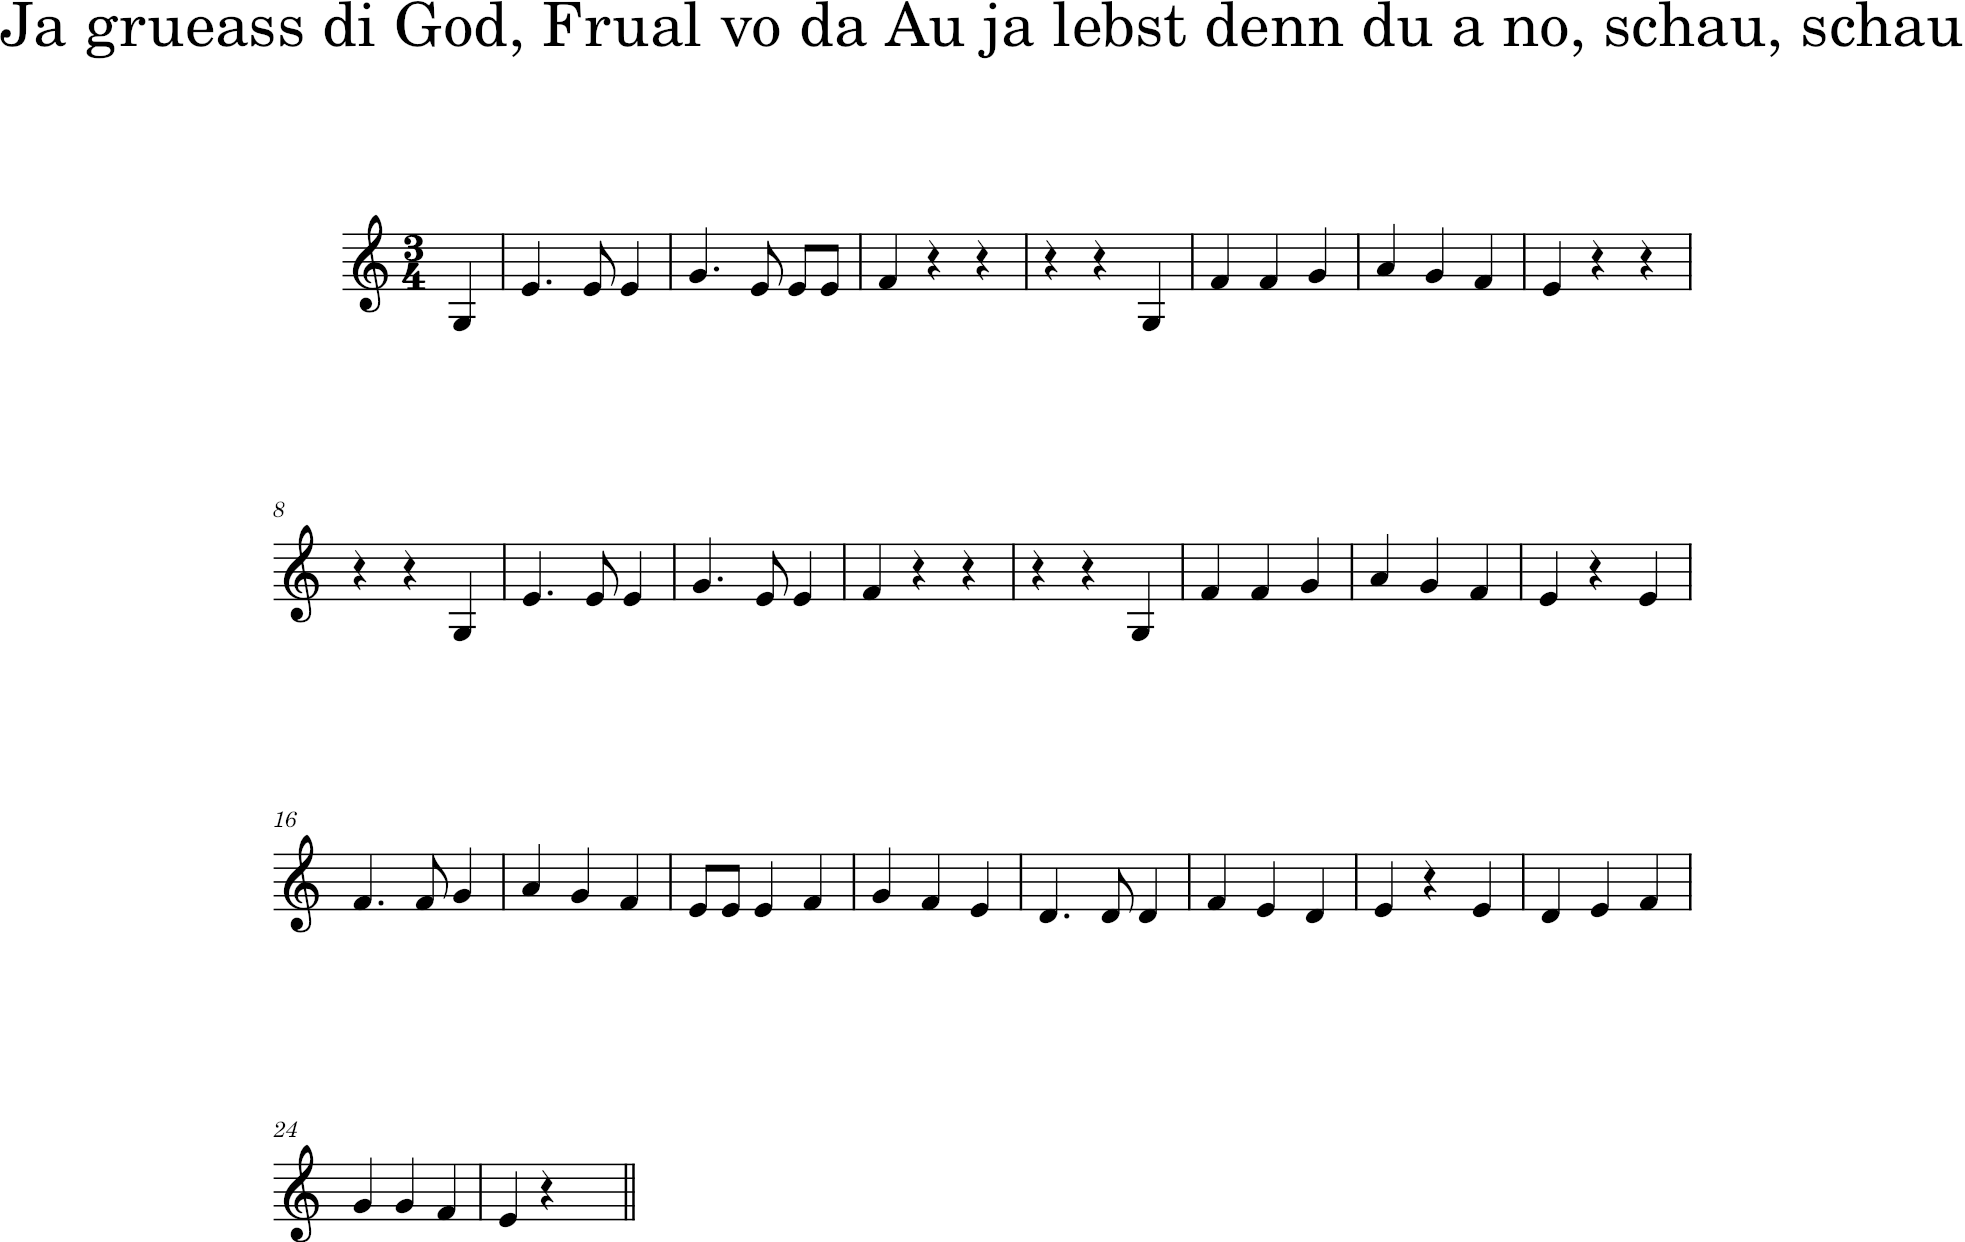

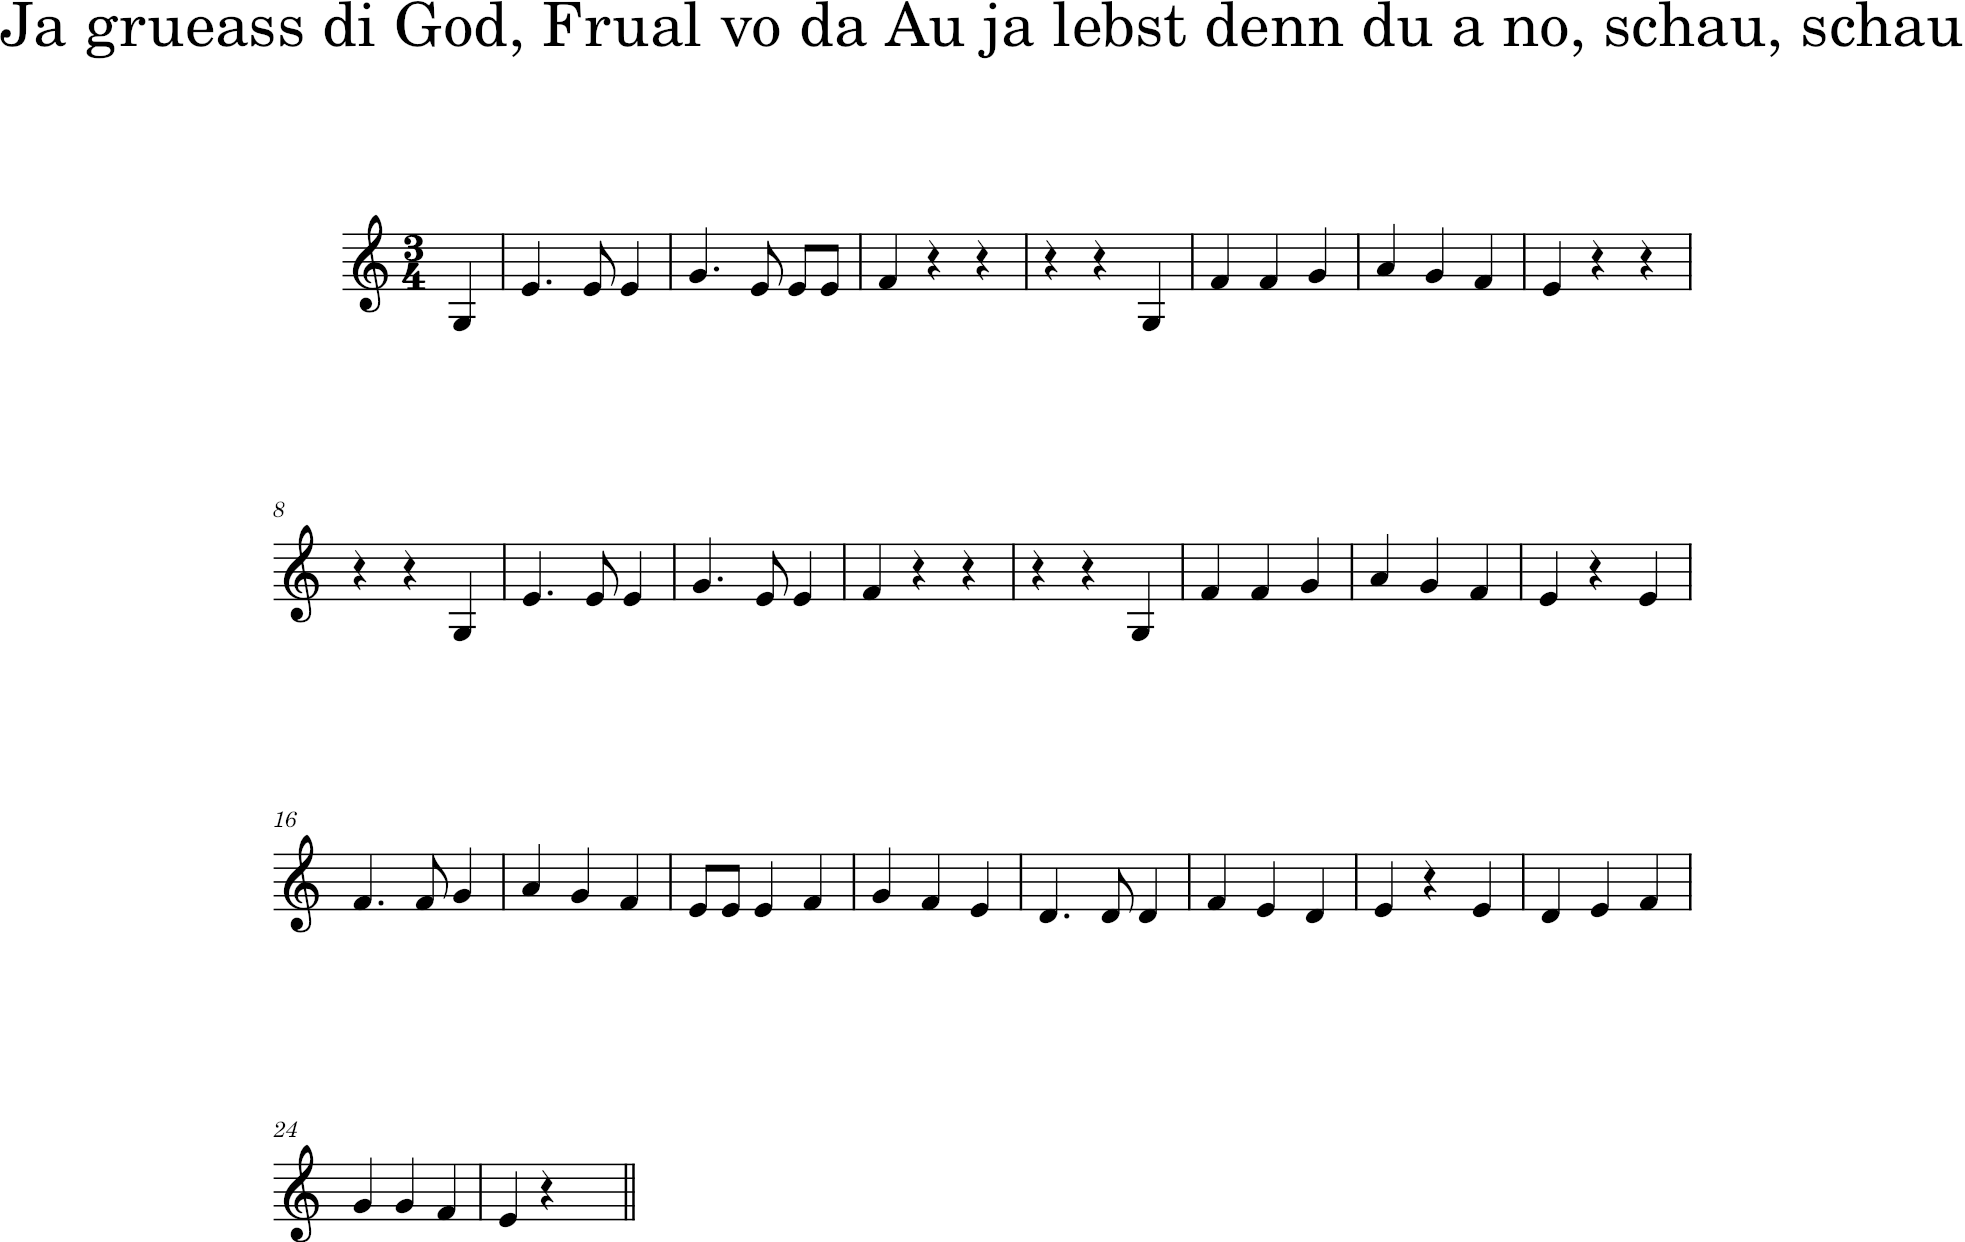

In [1]:
import os
import music21 as m21

KERN_DATASET_PATH = "deutschl/dva"

# durations are expressed in quarter length
ACCEPTABLE_DURATIONS = [
    0.25,  # 16th note
    0.5,   # 8th note
    0.75,
    1.0,   # quarter note
    1.5,
    2,     # half note
    3,
    4      # whole note
]

def load_songs_in_kern(dataset_path):
    """Loads all kern pieces in dataset using music21.

    :param dataset_path (str): Path to dataset
    :return songs (list of m21 streams): List containing all pieces
    """
    songs = []

    # go through all the files in dataset and load them with music21
    for path, subdirs, files in os.walk(dataset_path):
        for file in files:

            # consider only kern files
            if file[-3:] == "krn":
                song = m21.converter.parse(os.path.join(path, file))
                songs.append(song)
    return songs

def has_acceptable_durations(song, acceptable_durations):
    """Boolean routine that returns True if piece has all acceptable duration, False otherwise.

    :param song (m21 stream):
    :param acceptable_durations (list): List of acceptable duration in quarter length
    :return (bool):
    """
    for note in song.flat.notesAndRests:
        if note.duration.quarterLength not in acceptable_durations:
            return False
    return True

def transpose(song):
    """Transposes song to C maj/A min

    :param piece (m21 stream): Piece to transpose
    :return transposed_song (m21 stream):
    """

    # get key from the song
    parts = song.getElementsByClass(m21.stream.Part)
    measures_part0 = parts[0].getElementsByClass(m21.stream.Measure)
    key = measures_part0[0][4]

    # estimate key using music21
    if not isinstance(key, m21.key.Key):
        key = song.analyze("key")

    # get interval for transposition. E.g., Bmaj -> Cmaj
    if key.mode == "major":
        interval = m21.interval.Interval(key.tonic, m21.pitch.Pitch("C"))
    elif key.mode == "minor":
        interval = m21.interval.Interval(key.tonic, m21.pitch.Pitch("A"))

    # transpose song by calculated interval
    tranposed_song = song.transpose(interval)
    return tranposed_song

def preprocess(dataset_path):

    # load folk songs
    print("Loading songs...")
    songs = load_songs_in_kern(dataset_path)
    print(f"Loaded {len(songs)} songs.")

    for song in songs:

        # filter out songs that have non-acceptable durations
        if not has_acceptable_durations(song, ACCEPTABLE_DURATIONS):
            continue

        # transpose songs to Cmaj/Amin
        song = transpose(song)

        # encode songs with music time series representation

        # save songs to text file


if __name__ == "__main__":

    # load songs
    songs = load_songs_in_kern(KERN_DATASET_PATH)
    print(f"Loaded {len(songs)} songs.")
    song = songs[0]

    print(f"Has acceptable duration? {has_acceptable_durations(song, ACCEPTABLE_DURATIONS)}")

    # transpose song
    transposed_song = transpose(song)

    # Save songs as MusicXML
    song.write('musicxml', fp="original_song.xml")
    transposed_song.write('musicxml', fp="transposed_song.xml")

    # Show songs in MuseScore
    song.show()  # This will open the song in MuseScore if it's installed and properly configured
    transposed_song.show()  # This will open the transposed song in MuseScore